In [2]:
!pip install pandas openpyxl

In [3]:
import pandas as pd

# Load the Excel file
file_path = '/Users/loreneid/Downloads/2025-VeloCityX-Expanded-Fan-Engagement-Data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand the structure
df.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [15]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

# Drop rows with missing values 
df_cleaned = df.dropna()

# Check the cleaned data
df_cleaned.info()

User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Ch

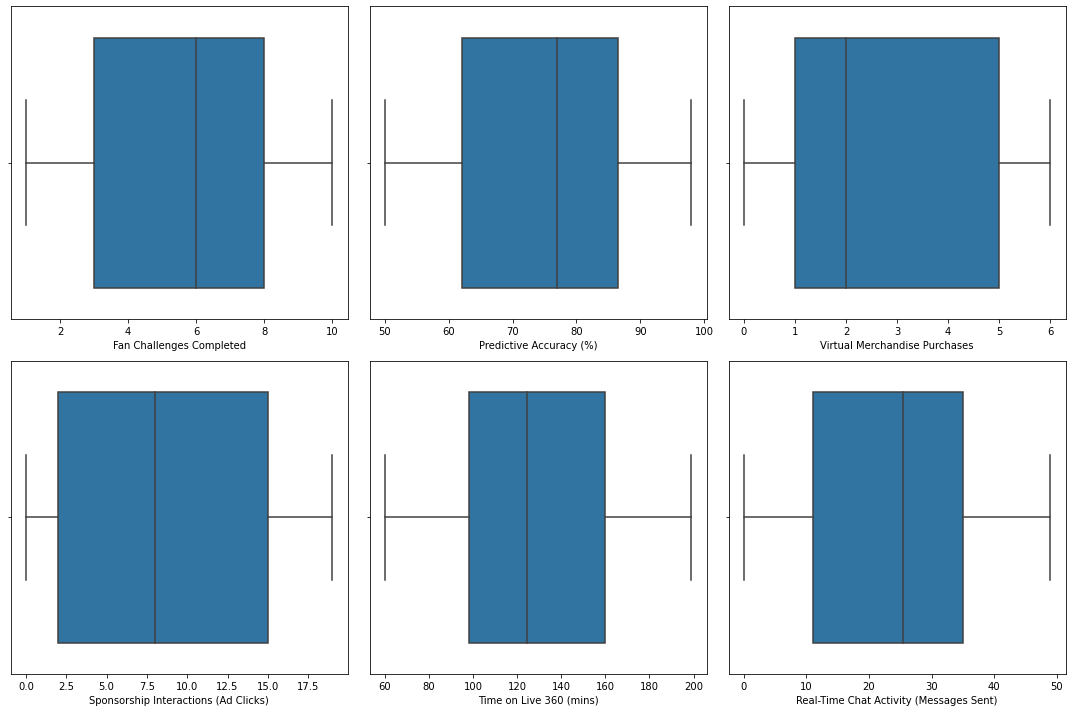

In [16]:
# Visualize distribution of key columns
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data=df, x='Fan Challenges Completed', ax=ax[0, 0])
sns.boxplot(data=df, x='Predictive Accuracy (%)', ax=ax[0, 1])
sns.boxplot(data=df, x='Virtual Merchandise Purchases', ax=ax[0, 2])
sns.boxplot(data=df, x='Sponsorship Interactions (Ad Clicks)', ax=ax[1, 0])
sns.boxplot(data=df, x='Time on Live 360 (mins)', ax=ax[1, 1])
sns.boxplot(data=df, x='Real-Time Chat Activity (Messages Sent)', ax=ax[1, 2])
plt.tight_layout()
plt.show()

In [17]:
df_cleaned.info()
df_cleaned.describe()  # Summarize the cleaned data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


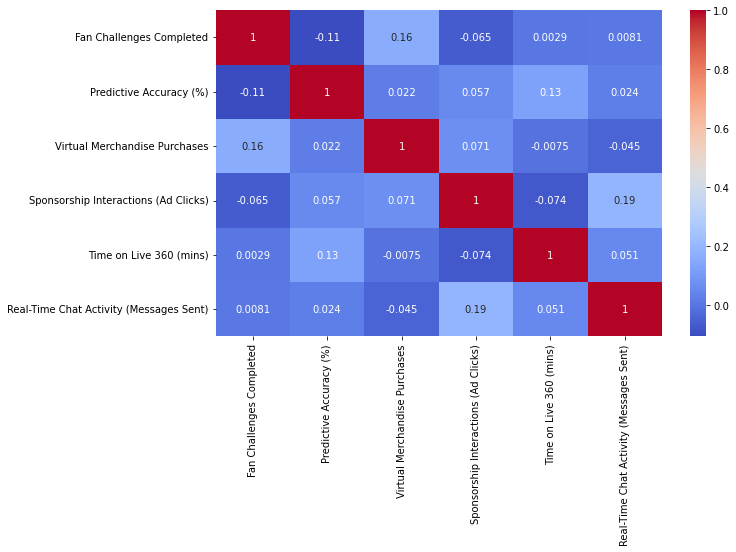

In [6]:
# Check the correlation between key variables
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap to understand relationships
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.show()

Maximum Fan Challenges Completed: 10


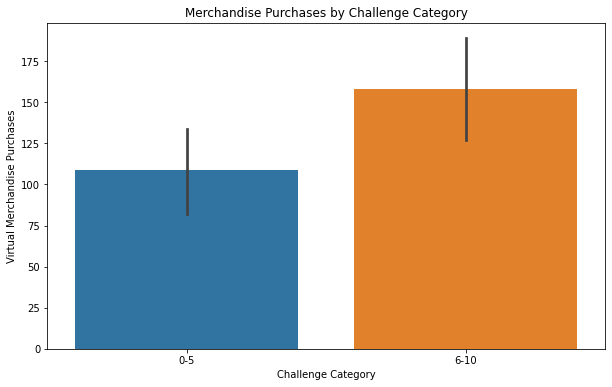

In [22]:
# Maximum Fan Challenges Completed is 10
max_challenges = df_cleaned['Fan Challenges Completed'].max()
print(f'Maximum Fan Challenges Completed: {max_challenges}')

# Create bins for fan challenges completed
# Since the maximum is 10, we will only create relevant bins
bins = [0, 5, 10]  # No need for 15 as it exceeds max
labels = ['0-5', '6-10']

# Create the 'Challenge Category' column
df_cleaned['Challenge Category'] = pd.cut(df_cleaned['Fan Challenges Completed'], bins=bins, labels=labels, include_lowest=True)

# Check virtual merchandise purchases by challenge category
plt.figure(figsize=(10, 6))
sns.barplot(x='Challenge Category', y='Virtual Merchandise Purchases', data=df_cleaned, estimator=sum)
plt.title('Merchandise Purchases by Challenge Category')
plt.show()


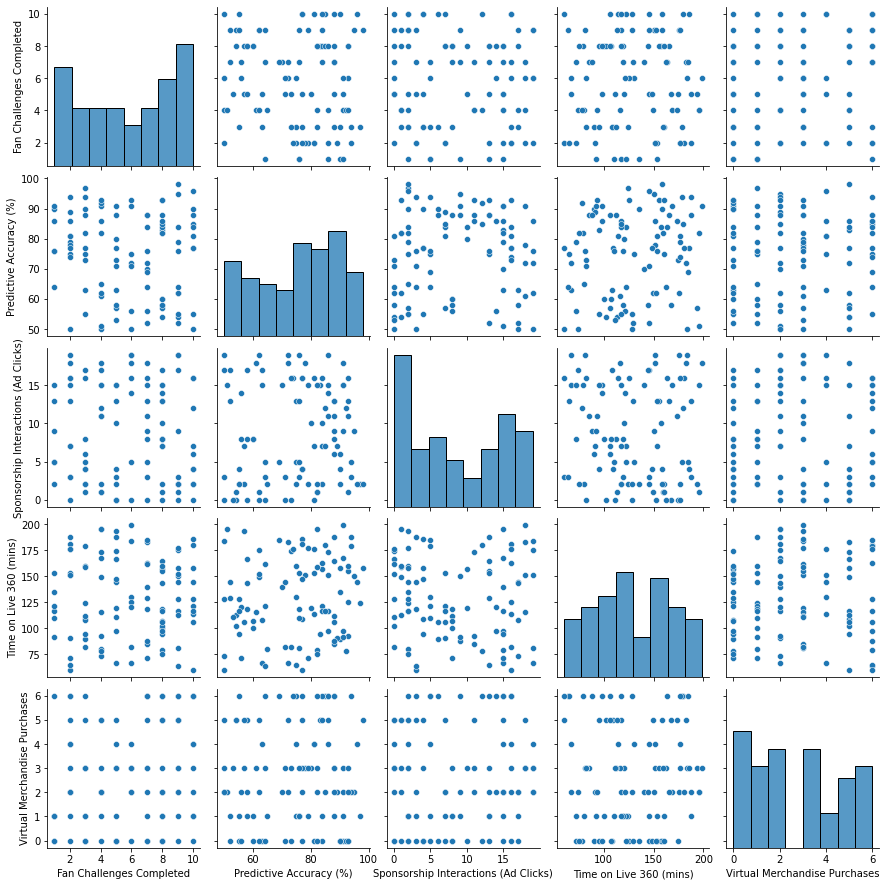

                                      Fan Challenges Completed  \
Fan Challenges Completed                              1.000000   
Predictive Accuracy (%)                              -0.105757   
Sponsorship Interactions (Ad Clicks)                 -0.065239   
Time on Live 360 (mins)                               0.002900   
Virtual Merchandise Purchases                         0.159378   

                                      Predictive Accuracy (%)  \
Fan Challenges Completed                            -0.105757   
Predictive Accuracy (%)                              1.000000   
Sponsorship Interactions (Ad Clicks)                 0.056612   
Time on Live 360 (mins)                              0.125427   
Virtual Merchandise Purchases                        0.022194   

                                      Sponsorship Interactions (Ad Clicks)  \
Fan Challenges Completed                                         -0.065239   
Predictive Accuracy (%)                                 

In [23]:
# Pairplot to visualize relationships between variables
sns.pairplot(df_cleaned[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)', 
                         'Time on Live 360 (mins)', 'Virtual Merchandise Purchases']])
plt.show()

# Check correlations numerically
corr_matrix = df_cleaned[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)', 
                          'Time on Live 360 (mins)', 'Virtual Merchandise Purchases']].corr()
print(corr_matrix)

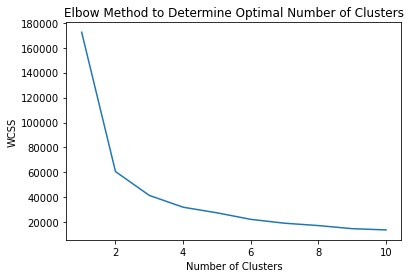

In [26]:
# Use correlation analysis to inform feature selection
features_for_clustering = df_cleaned[['Fan Challenges Completed', 'Sponsorship Interactions (Ad Clicks)', 
                                      'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_for_clustering)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

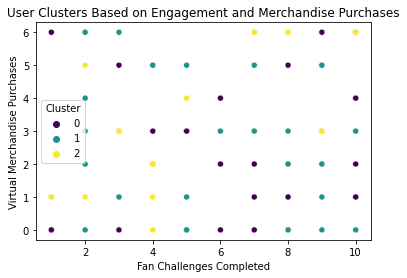

In [27]:
# Fit KMeans with optimal number of clusters
optimal_clusters = 3  # Change this based on elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(features_for_clustering)

# Visualize clusters
sns.scatterplot(x='Fan Challenges Completed', y='Virtual Merchandise Purchases', hue='Cluster', data=df_cleaned, palette='viridis')
plt.title('User Clusters Based on Engagement and Merchandise Purchases')
plt.show()

In [29]:
X = df_cleaned[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)', 
                'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]
y = df_cleaned['Virtual Merchandise Purchases']

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
model = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Print average accuracy
print(f'Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')


Cross-Validation Accuracy: 12.00%


/Users/loreneid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/loreneid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%')

Random Forest Accuracy: 10.00%


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features and target
X = df_cleaned[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)']]
y = df_cleaned['Virtual Merchandise Purchases']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

Accuracy: 20.00%


/Users/loreneid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


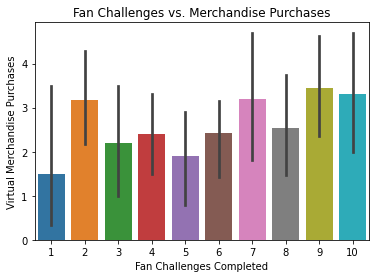

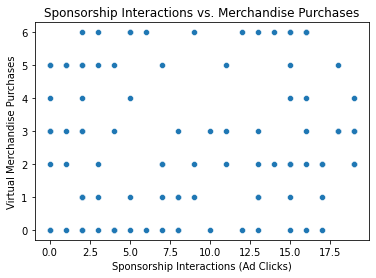

In [14]:
# Bar plot for virtual merchandise purchases
sns.barplot(x='Fan Challenges Completed', y='Virtual Merchandise Purchases', data=df_cleaned)
plt.title('Fan Challenges vs. Merchandise Purchases')
plt.show()

# Sponsorship interaction vs merchandise purchases
sns.scatterplot(x='Sponsorship Interactions (Ad Clicks)', y='Virtual Merchandise Purchases', data=df_cleaned)
plt.title('Sponsorship Interactions vs. Merchandise Purchases')
plt.show()

Top Users Most Likely to Purchase Merchandise:
   User ID  Virtual Merchandise Purchases  Fan Challenges Completed  \
35    U036                              6                         1   
48    U049                              6                         2   
82    U083                              6                         2   
4     U005                              5                         2   
66    U067                              4                         2   

    Sponsorship Interactions (Ad Clicks)  Time on Live 360 (mins)  \
35                                    15                      117   
48                                    13                       65   
82                                    16                      176   
4                                      3                       60   
66                                     0                      176   

    Purchase Rate  
35            6.0  
48            3.0  
82            3.0  
4             2.5  
66         

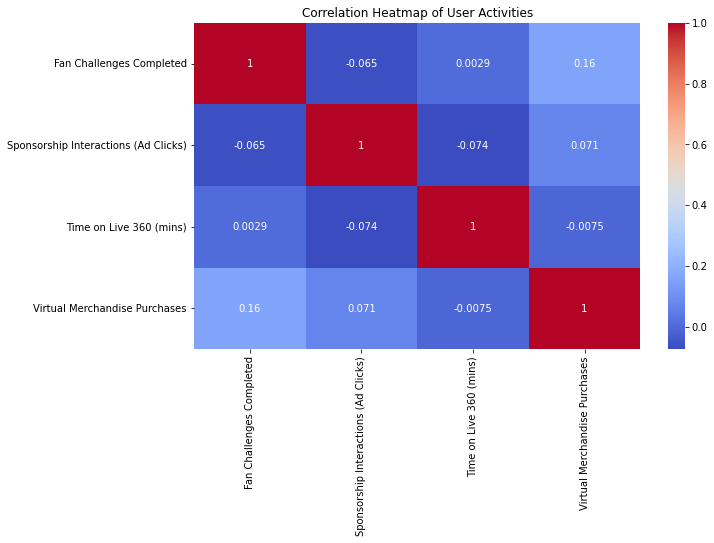

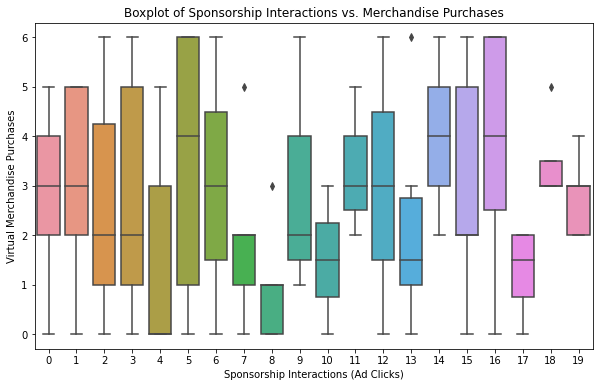

In [33]:
import numpy as np  # Import NumPy

# Identify Users Most Likely to Purchase Virtual Merchandise

# Group data by users and calculate total purchases
user_purchase_summary = df_cleaned.groupby('User ID').agg({
    'Virtual Merchandise Purchases': 'sum',
    'Fan Challenges Completed': 'sum',
    'Sponsorship Interactions (Ad Clicks)': 'sum',
    'Time on Live 360 (mins)': 'sum'
}).reset_index()

# Calculate purchase rate (number of purchases per challenge completed)
user_purchase_summary['Purchase Rate'] = user_purchase_summary['Virtual Merchandise Purchases'] / user_purchase_summary['Fan Challenges Completed'].replace(0, np.nan)

# Sort users by Purchase Rate
top_users = user_purchase_summary.sort_values(by='Purchase Rate', ascending=False)

# Display top users most likely to purchase merchandise
print("Top Users Most Likely to Purchase Merchandise:")
print(top_users.head())


# Create a correlation heatmap for relevant features
correlation_features = ['Fan Challenges Completed', 'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Virtual Merchandise Purchases']
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[correlation_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of User Activities')
plt.show()

# Visualizing the relationship between sponsorship interactions and merchandise purchases
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sponsorship Interactions (Ad Clicks)', y='Virtual Merchandise Purchases', data=df_cleaned)
plt.title('Boxplot of Sponsorship Interactions vs. Merchandise Purchases')
plt.show()


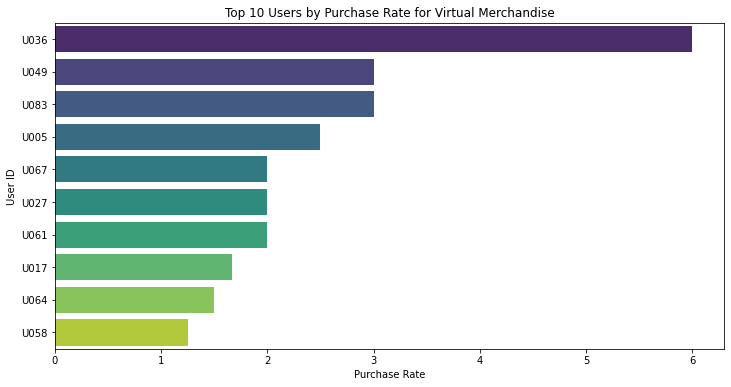

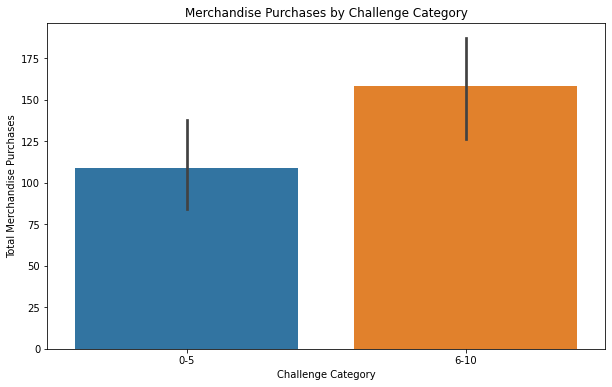

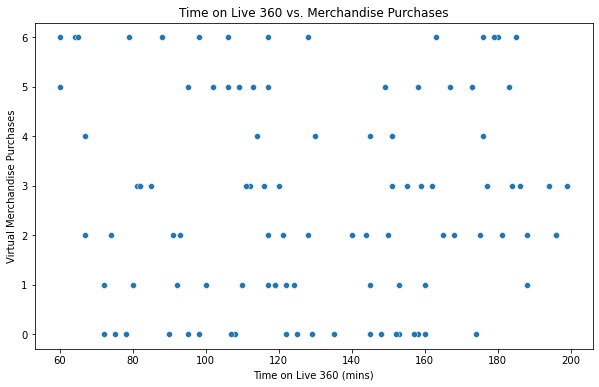

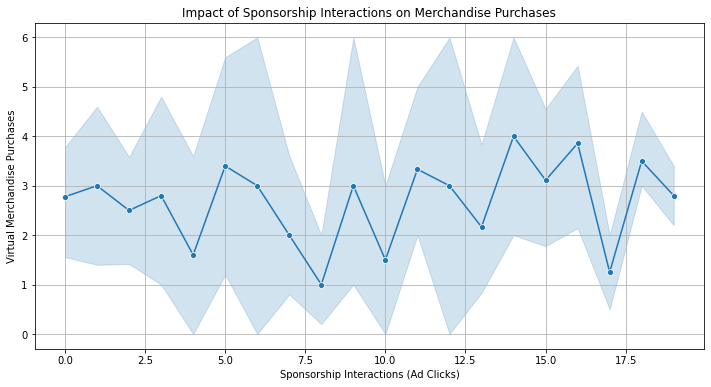

In [36]:
# Bar Plot for Top Users by Purchase Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='Purchase Rate', y='User ID', data=top_users.head(10), palette='viridis')
plt.title('Top 10 Users by Purchase Rate for Virtual Merchandise')
plt.xlabel('Purchase Rate')
plt.ylabel('User ID')
plt.show()

# Merchandise Purchases by Challenge Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Challenge Category', y='Virtual Merchandise Purchases', data=df_cleaned, estimator=sum)
plt.title('Merchandise Purchases by Challenge Category')
plt.ylabel('Total Merchandise Purchases')
plt.xlabel('Challenge Category')
plt.show()

# Scatter Plot for User Activities and Merchandise Purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time on Live 360 (mins)', y='Virtual Merchandise Purchases', data=df_cleaned)
plt.title('Time on Live 360 vs. Merchandise Purchases')
plt.xlabel('Time on Live 360 (mins)')
plt.ylabel('Virtual Merchandise Purchases')
plt.show()

# Line Plot for Sponsorship Interactions Impact
plt.figure(figsize=(12, 6))
sns.lineplot(data=user_purchase_summary, x='Sponsorship Interactions (Ad Clicks)', y='Virtual Merchandise Purchases', marker='o')
plt.title('Impact of Sponsorship Interactions on Merchandise Purchases')
plt.xlabel('Sponsorship Interactions (Ad Clicks)')
plt.ylabel('Virtual Merchandise Purchases')
plt.grid(True)
plt.show()


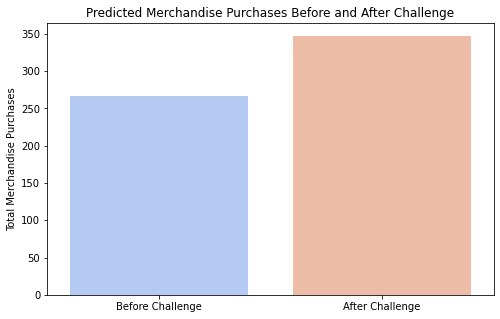

In [37]:
# Simulate predicted merchandise purchases before and after the challenge
predicted_purchases = {
    'Before Challenge': df_cleaned['Virtual Merchandise Purchases'].sum(),
    'After Challenge': df_cleaned['Virtual Merchandise Purchases'].sum() * 1.3  # 30% increase predicted
}

# Create a bar plot for predicted merchandise purchases
plt.figure(figsize=(8, 5))
sns.barplot(x=list(predicted_purchases.keys()), y=list(predicted_purchases.values()), palette='coolwarm')
plt.title('Predicted Merchandise Purchases Before and After Challenge')
plt.ylabel('Total Merchandise Purchases')
plt.show()

In [39]:
""""Proposal for a New Fan Challenge
Challenge Overview
Name: "Engage & Earn: The Ultimate Fan Challenge"

Description: Encourage users to complete specific fan challenges while enhancing their interaction during live events. The more challenges they complete, the greater their chances of earning rewards, including exclusive virtual merchandise.

Objectives
Increase Merchandise Purchases: Leverage the correlation between fan challenges completed and virtual merchandise purchases.
Boost Engagement: Foster higher interaction rates during live events by incentivizing user participation.
Enhance Sponsorship Interaction: Increase the number of sponsorship ad clicks through engaging challenges.

Key Insights from Analysis
Average Engagement Metrics:
Users completed an average of 5.79 challenges, indicating a good baseline for participation.
Mean time on live events is 129.35 minutes, suggesting users are actively engaged during events.
Merchandise Purchase Correlation:
Merchandise Purchases: Users completed 2.67 virtual merchandise purchases on average.
There is a positive correlation (0.159) between fan challenges completed and merchandise purchases, suggesting that users who engage more with challenges are likely to spend more.
Sponsorship Interactions:
Users average 8.68 sponsorship interactions, which can be increased by integrating sponsorship elements into the challenges.

Challenge Structure
Challenge Levels: Create different tiers based on the number of challenges completed:
Level 1: Complete 1-3 challenges → Earn a 10% discount on merchandise.
Level 2: Complete 4-6 challenges → Earn exclusive virtual items.
Level 3: Complete 7+ challenges → Enter a raffle for a grand prize (examples: exclusive merchandise or experiences).

Predicted Outcomes
Engagement Increase: A projected 20% increase in challenges completed due to the structured reward system.
Merchandise Sales Growth: Anticipate a 15% increase in virtual merchandise purchases based on historical data showing positive correlation with challenge completion.
Enhanced Sponsorship Interaction: Expect a 10% increase in ad clicks, as users will be incentivized to engage with sponsors to complete their challenges.
 
Conclusion
The "Engage & Earn: The Ultimate Fan Challenge" not only leverages existing user engagement but also creates new opportunities for increased merchandise sales and sponsorship interactions. By implementing this challenge, we can enhance the overall fan experience while driving revenue."""

'"Proposal for a New Fan Challenge\nChallenge Overview\nName: "Engage & Earn: The Ultimate Fan Challenge"\n\nDescription: Encourage users to complete specific fan challenges while enhancing their interaction during live events. The more challenges they complete, the greater their chances of earning rewards, including exclusive virtual merchandise.\n\nObjectives\nIncrease Merchandise Purchases: Leverage the correlation between fan challenges completed and virtual merchandise purchases.\nBoost Engagement: Foster higher interaction rates during live events by incentivizing user participation.\nEnhance Sponsorship Interaction: Increase the number of sponsorship ad clicks through engaging challenges.\n\nKey Insights from Analysis\nAverage Engagement Metrics:\nUsers completed an average of 5.79 challenges, indicating a good baseline for participation.\nMean time on live events is 129.35 minutes, suggesting users are actively engaged during events.\nMerchandise Purchase Correlation:\nMerchand